# Tutorial - build MNB with sklearn

This tutorial demonstrates how to use the Sci-kit Learn (sklearn) package to build Multinomial Naive Bayes model, rank features, and use the model for prediction. 

The data from the Kaggle Sentiment Analysis on Movie Review Competition are used in this tutorial. Check out the details of the data and the competition on Kaggle.
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

The tutorial also includes sample code to prepare your prediction result for submission to Kaggle. Although the competition is over, you can still submit your prediction to get an evaluation score.

# Step 1: Read in data

In [1]:
# read in the training data

# the data set includes four columns: PhraseId, SentenceId, Phrase, Sentiment
# In this data set a sentence is further split into phrases 
# in order to build a sentiment classification model
# that can not only predict sentiment of sentences but also shorter phrases

# A data example:
# PhraseId SentenceId Phrase Sentiment
# 1 1 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .1

# the Phrase column includes the training examples
# the Sentiment column includes the training labels
# "0" for very negative
# "1" for negative
# "2" for neutral
# "3" for positive
# "4" for very positive


import pandas as p
pre=p.read_csv("/Users/kenmckee/Desktop/pri.csv", delimiter=',') 





#print(pre)
pre = pre.replace('\n',' ', regex=True)
pre = pre.replace('\r',' ', regex=True)
pre = pre.replace('\.','', regex=True)

chars = chars = ['BERNSTEIN','KANE','LELAND','SUSAN','THOMPSON']

ccorpus = pre.loc[pre['char'].isin(chars)]
#ccorpus = pre.groupby('char')['text'].apply(' '.join).reset_index()
#ccorpus = ccorpus.groupby('char')['text'].apply(' '.join).reset_index()
#ccorpus = ccorpus.apply(lambda x: x.str.strip() if x.dtype == "object" else x)




y=ccorpus['char'].values 
X=ccorpus['text'].values



# Step 2: Split train/test data for hold-out test

In [2]:
# check the sklearn documentation for train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# "test_size" : float, int, None, optional
# If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
# If int, represents the absolute number of test samples. 
# If None, the value is set to the complement of the train size. 
# By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(403,) (403,) (269,) (269,)
Charlie 
LELAND
Mr Bernstein these men who are now with the Enquirer  who were with the Chronicle until yesterday  weren't they just as devoted to the Chronicle kind of paper as they are now to  our kind of paper?
LELAND


# Step 2.1 Data Checking

In [3]:
# Check how many training examples in each category
# this is important to see whether the data set is balanced or skewed

#print(list(y_train))
print("train vectors")
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

print("\n test vectors")
training_labels = set(y_test)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_test)
print(training_category_dist)



train vectors
{'SUSAN', 'BERNSTEIN', 'LELAND', 'THOMPSON', 'KANE'}
[['BERNSTEIN' 58]
 ['KANE' 178]
 ['LELAND' 64]
 ['SUSAN' 63]
 ['THOMPSON' 40]]

 test vectors
{'SUSAN', 'BERNSTEIN', 'LELAND', 'THOMPSON', 'KANE'}
[['BERNSTEIN' 38]
 ['KANE' 134]
 ['LELAND' 40]
 ['SUSAN' 32]
 ['THOMPSON' 25]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


# Exercise A

# Step 3: Vectorization

In [4]:
# sklearn contains two vectorizers

# CountVectorizer can give you Boolean or TF vectors
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# TfidfVectorizer can give you TF or TFIDF vectors
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Read the sklearn documentation to understand all vectorization options

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# several commonly used vectorizer setting

#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=3, stop_words='english')

#  unigram SVM vectorizer, set minimum document frequency to 5


## Step 3.1: Vectorize the training data

In [5]:
# The vectorizer can do "fit" and "transform"
# fit is a process to collect unique tokens into the vocabulary
# transform is a process to convert each document to vector based on the vocabulary
# These two processes can be done together using fit_transform(), or used individually: fit() or transform()



#  unigram boolean vectorizer, set minimum document frequency to 5
X_train_bool = unigram_bool_vectorizer.fit_transform(X_train)
X_test_bool = unigram_bool_vectorizer.transform(X_test)

#  unigram term frequency vectorizer, set minimum document frequency to 5
X_train_uni = unigram_count_vectorizer.fit_transform(X_train) 
X_test_uni = unigram_count_vectorizer.transform(X_test) 

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
X_train_gram = gram12_count_vectorizer.fit_transform(X_train) 
X_test_gram = gram12_count_vectorizer.transform(X_test)

#  unigram tfidf vectorizer, set minimum document frequency to 5
X_train_tfidf = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = unigram_tfidf_vectorizer.transform(X_test)



# check the content of a document vector
print(X_train_tfidf.shape)
print(X_train_tfidf[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_tfidf_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print("\n tfidf")
print(list(unigram_tfidf_vectorizer.vocabulary_.items())[:10])
print("\n unigram")
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])
print("\n gram12")
print(list(gram12_count_vectorizer.vocabulary_.items())[:10])
print("\n bool")
print(list(unigram_bool_vectorizer.vocabulary_.items())[:10])


# check word index in vocabulary
print(unigram_tfidf_vectorizer.vocabulary_.get('imaginative'))

(403, 227)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
227

 tfidf
[('charlie', 18), ('ll', 99), ('mr', 119), ('carter', 12), ('ve', 204), ('good', 63), ('day', 28), ('wonderful', 215), ('kane', 82), ('singing', 161)]

 unigram
[('charlie', 11), ('ll', 46), ('mr', 62), ('carter', 7), ('ve', 99), ('good', 30), ('day', 15), ('wonderful', 105

# Exercise B

# Step 4: Train a MNB classifier

In [6]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_gram,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Step 4.1 Interpret a trained MNB model

In [7]:
## interpreting naive Bayes models
## by consulting the sklearn documentation you can also find out how to print the coef_ for naive Bayes 
## which are the conditional probabilities
## http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

# the code below will print out the conditional prob of the word "worthless" in each category
# sample output
# -8.98942647599 -> logP('worthless'|very negative')
# -11.1864401922 -> logP('worthless'|negative')
# -12.3637684625 -> logP('worthless'|neutral')
# -11.9886066961 -> logP('worthless'|positive')
# -11.0504454621 -> logP('worthless'|very positive')
# the above output means the word feature "worthless" is indicating "very negative" 
# because P('worthless'|very negative) is the greatest among all conditional probs

gram12_count_vectorizer.vocabulary_.get('charlie')
for i in range(0,5):
  print(nb_clf.coef_[i][unigram_tfidf_vectorizer.vocabulary_.get('charlie')])

-5.958424693029782
-5.842094090453713
-4.356708826689592
-5.87493073085203
-5.375278407684165


Sample output:

-8.5389826392
-10.6436375867
-11.8419845779
-11.4778370023
-10.6297551464

In [8]:
# sort the conditional probability for category 0 "very negative"
# print the words with highest conditional probs
# these can be words popular in the "very negative" category alone, or words popular in all cateogires

feature_ranks = sorted(zip(nb_clf.coef_[0], gram12_count_vectorizer.get_feature_names()))
very_negative_features = feature_ranks[-10:]
print(very_negative_features)

[(-4.166665223801727, 'tell'), (-4.166665223801727, 'thompson'), (-4.166665223801727, 'want'), (-4.0125145439744685, 'just'), (-3.878983151349946, 'don'), (-3.878983151349946, 'wonderful'), (-3.655839600035736, 'leland'), (-3.125211348973566, 'mr kane'), (-3.0680529351336174, 'kane'), (-2.7395488681615814, 'mr')]


In [9]:
# pretty print of top and bottom features

# This is a function I found from stackexchange, and adapted a little bit
# The purpose is to print the top and bottom features nicely
# https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

# You can find many useful scripts from stackexchange or GitHub
# Most tasks are not so unique, so someone in this world might have done something similar and shared their code

def show_most_and_least_informative_features(vectorizer, clf, class_idx=0, n=10):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[class_idx], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[-n:])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        


In [10]:
# show most positive features (category 4)
show_most_and_least_informative_features(gram12_count_vectorizer, nb_clf, class_idx=4, n=10)

	-5.3753	ask            		-4.2767	thought        
	-5.3753	brad           		-4.2767	yes            
	-5.3753	business       		-3.9890	didn           
	-5.3753	came           		-3.9890	mr kane        
	-5.3753	carter         		-3.9890	sorry          
	-5.3753	cents          		-3.7658	know           
	-5.3753	changed        		-3.7658	ll             
	-5.3753	charlie        		-3.7658	maybe          
	-5.3753	chronicle      		-3.4294	kane           
	-5.3753	country        		-3.1781	mr             


In [11]:
nb_clf.coef_[4][0]

-4.276666119016055

# Exercise C

In [12]:
# calculate log ratio of conditional probs

# In this exercise you will calculate the log ratio 
# between conditional probs in the "very negative" category
# and conditional probs in the "very positive" category,
# and then sort and print out the top and bottom 10 words

# the conditional probs for the "very negative" category is stored in nb_clf.coef_[0]
# the conditional probs for the "very positive" category is stored in nb_clf.coef_[4]

# You can consult with similar code in week 4's sample script on feature weighting
# Note that in sklearn's MultinomialNB the conditional probs have been converted to log values.

# Your code starts here

ratios = (nb_clf.feature_log_prob_[0]/nb_clf.feature_log_prob_[4])
feature_ranks = sorted(zip(ratios,gram12_count_vectorizer.get_feature_names()))
botton_features = feature_ranks[0:10]
top_features = feature_ranks[-10:]
print("Top Features:")
[print(x[0],x[1]) for x in reversed(top_features) ]
print("Bottom Features:")
[print(x[0],x[1]) for x in botton_features]




# Your code ends here

Top Features:
1.4937198603643935 sorry
1.3932405586996475 mr bernstein
1.3932405586996475 live
1.3932405586996475 bernstein
1.2904987373977888 maybe
1.272588145012216 remember
1.272588145012216 people
1.272588145012216 mrs kane
1.272588145012216 mrs
1.272588145012216 love
Bottom Features:
0.72163390566055 wonderful
0.7751533795617582 looking
0.7751533795617582 thompson
0.7751533795617582 want
0.7834604782802581 mr kane
0.8090719123271157 elected
0.8090719123271157 thatcher
0.8284652785634182 don
0.8505848414053971 enquirer
0.8505848414053971 looks


[None, None, None, None, None, None, None, None, None, None]

# Step 5: Test the MNB classifier

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[15 13  1  3  6]
 [11 97 13 10  3]
 [ 2 21 10  7  0]
 [ 2 12  4 11  3]
 [ 4 10  3  2  6]]
Normalized confusion matrix
[[0.39 0.34 0.03 0.08 0.16]
 [0.08 0.72 0.1  0.07 0.02]
 [0.05 0.53 0.25 0.17 0.  ]
 [0.06 0.38 0.12 0.34 0.09]
 [0.16 0.4  0.12 0.08 0.24]]


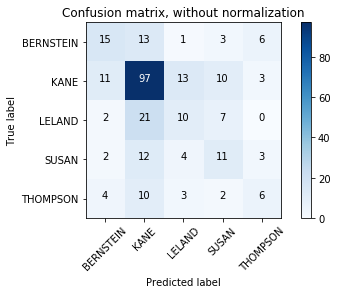

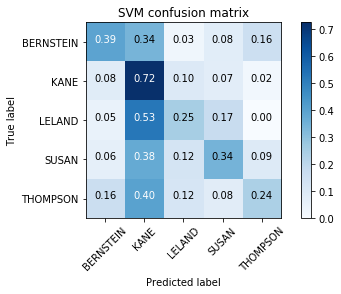

In [33]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(decision_function_shape='ovo')
classifiern = svm.LinearSVC()
#y_pred = classifier.fit(X_train_gram, y_train).predict(X_test_gram)
y_predx = classifiern.fit(X_train_gram, y_train).predict(X_test_gram)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predx)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=chars,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=chars, normalize=True,
                      title='SVM confusion matrix')

plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 13  19   1   2   3]
 [  4 112   6   9   3]
 [  2  23  12   3   0]
 [  4  11   4  13   0]
 [  5  14   3   2   1]]
Normalized confusion matrix
[[0.34 0.5  0.03 0.05 0.08]
 [0.03 0.84 0.04 0.07 0.02]
 [0.05 0.57 0.3  0.07 0.  ]
 [0.12 0.34 0.12 0.41 0.  ]
 [0.2  0.56 0.12 0.08 0.04]]


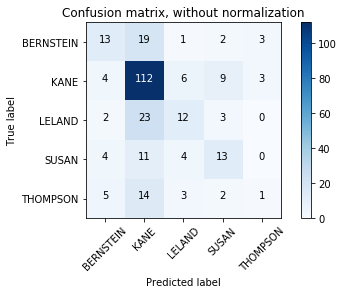

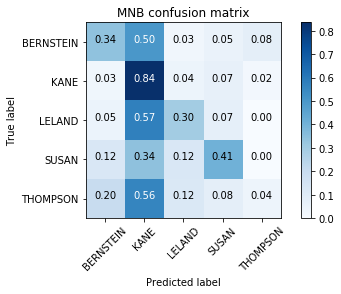

In [35]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
classifiern = nb_clf
#y_pred = classifier.fit(X_train_gram, y_train).predict(X_test_gram)
y_predn = classifiern.fit(X_train_gram, y_train).predict(X_test_gram)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=chars,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=chars, normalize=True,
                      title='MNB confusion matrix')

plt.show()

In [36]:
# print classification report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_predn, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['Bernstein','Kane','Leland','Susan','Thompson']
print(classification_report(y_test, y_predx, target_names=target_names))

from sklearn.metrics import classification_report
target_names = ['Bernstein','Kane','Leland','Susan','Thompson']
print(classification_report(y_test, y_predn, target_names=target_names))

[0.46 0.63 0.46 0.45 0.14]
[0.03 1.   0.   0.   0.  ]
             precision    recall  f1-score   support

  Bernstein       0.44      0.39      0.42        38
       Kane       0.63      0.72      0.68       134
     Leland       0.32      0.25      0.28        40
      Susan       0.33      0.34      0.34        32
   Thompson       0.33      0.24      0.28        25

avg / total       0.50      0.52      0.50       269

             precision    recall  f1-score   support

  Bernstein       0.46      0.34      0.39        38
       Kane       0.63      0.84      0.72       134
     Leland       0.46      0.30      0.36        40
      Susan       0.45      0.41      0.43        32
   Thompson       0.14      0.04      0.06        25

avg / total       0.51      0.56      0.52       269



# Step 5.1 Interpret the prediction result

In [38]:
## find the calculated posterior probability
posterior_probs = nb_clf.predict_proba(X_test_gram)

## find the posterior probabilities for the first test example
print(posterior_probs[0:50])

# find the category prediction for the first test example
y_pred = nb_clf.predict(X_test_gram)
print(y_pred[0:50])

# check the actual label for the first test example
print(y_test[0:50])

[[3.39e-03 9.85e-01 7.37e-05 4.95e-06 1.16e-02]
 [1.33e-01 6.76e-01 9.03e-02 6.40e-02 3.68e-02]
 [3.81e-01 9.62e-02 1.08e-01 2.58e-01 1.58e-01]
 [1.07e-02 8.56e-01 1.03e-01 1.21e-02 1.90e-02]
 [3.01e-01 2.18e-01 5.61e-02 3.73e-01 5.16e-02]
 [1.44e-01 4.42e-01 1.59e-01 1.56e-01 9.93e-02]
 [3.12e-01 4.48e-01 1.14e-01 6.14e-02 6.43e-02]
 [1.13e-01 6.23e-01 2.27e-02 1.80e-01 6.04e-02]
 [3.90e-01 2.24e-01 7.12e-02 1.54e-01 1.61e-01]
 [1.09e-01 6.22e-02 3.63e-02 6.48e-01 1.45e-01]
 [1.03e-01 8.93e-01 1.88e-05 2.17e-09 3.48e-03]
 [1.08e-01 6.98e-01 2.96e-02 6.38e-02 1.00e-01]
 [3.46e-01 2.23e-01 1.83e-01 1.73e-01 7.45e-02]
 [6.78e-02 7.52e-01 6.09e-02 6.30e-02 5.60e-02]
 [1.57e-01 5.90e-01 1.14e-01 1.01e-01 3.86e-02]
 [9.28e-01 5.89e-03 7.73e-03 2.74e-03 5.56e-02]
 [1.93e-01 5.84e-01 1.06e-01 5.71e-02 5.98e-02]
 [6.91e-02 4.46e-01 3.75e-01 5.91e-02 5.10e-02]
 [5.69e-02 9.28e-01 5.03e-03 2.17e-03 7.78e-03]
 [2.64e-03 9.63e-01 1.35e-02 2.13e-04 2.02e-02]
 [1.44e-01 4.42e-01 1.59e-01 1.56e-01 9.

# Step 5.2 Error Analysis

In [39]:
# print out specific type of error for further analysis

# print out the very positive examples that are mistakenly predicted as negative
# according to the confusion matrix, there should be 53 such examples
# note if you use a different vectorizer option, your result might be different

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and y_pred[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

errors: 0


# Exercise D

In [41]:
# Can you find linguistic patterns in the above errors? 
# What kind of very positive examples were mistakenly predicted as negative?

# Can you write code to print out the errors that very negative examples were mistakenly predicted as very positive?
# Can you find lingustic patterns for this kind of errors?
# Based on the above error analysis, what suggestions would you give to improve the current model?

# Your code starts here
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and y_pred[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)
# Your code ends here

errors: 0


# Step 6: write the prediction output to file

In [ ]:
y_pred=nb_clf.predict(X_test_vec)
output = open('/Users/byu/Desktop/data/prediction_output.csv', 'w')
for x, value in enumerate(y_pred):
  output.write(str(value) + '\n') 
output.close()

# Step 6.1 Prepare submission to Kaggle sentiment classification competition

In [ ]:
########## submit to Kaggle submission

# we are still using the model trained on 60% of the training data
# you can re-train the model on the entire data set 
#   and use the new model to predict the Kaggle test data
# below is sample code for using a trained model to predict Kaggle test data 
#    and format the prediction output for Kaggle submission

# read in the test data
kaggle_test=p.read_csv("/Users/byu/Desktop/data/kaggle/test.tsv", delimiter='\t') 

# preserve the id column of the test examples
kaggle_ids=kaggle_test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=kaggle_test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec=unigram_tfidf_vectorizer.transform(kaggle_X_test)

# predict using the NB classifier that we built
kaggle_pred=nb_clf.fit(X_train_vec, y_train).predict(kaggle_X_test_vec)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('/Users/byu/Desktop/data/kaggle/kaggle_submission.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

# Exercise E

In [ ]:
# generate your Kaggle submissions with boolean representation and TF representation
# read in the test data
kaggle_test=p.read_csv("/Users/kenmckee/Desktop/GS/S18/tm/ks/test.tsv", delimiter='\t') 

# preserve the id column of the test examples
kaggle_ids=kaggle_test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=kaggle_test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec=unigram_tfidf_vectorizer.transform(kaggle_X_test)

# predict using the NB classifier that we built
kaggle_pred=nb_clf.fit(X_train_vec, y_train).predict(kaggle_X_test_vec)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('/Users/kenmckee/Desktop/GS/S18/tm/ks/kaggle_submission.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()
# submit to Kaggle

# report your scores here
# which model gave better performance in the hold-out test
# which model gave better performance in the Kaggle test

Sample output:

(93636, 9968)
[[0 0 0 ..., 0 0 0]]
9968
[('disloc', 2484), ('surgeon', 8554), ('camaraderi', 1341), ('sketchiest', 7943), ('dedic', 2244), ('impud', 4376), ('adopt', 245), ('worker', 9850), ('buy', 1298), ('systemat', 8623)]
245

# BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
X_train_vec_bool = unigram_tfidf_vectorizer.fit_transform(X_train)
bernoulliNB_clf = BernoulliNB(X_train_vec_bool, y_train)

# Cross Validation

In [42]:
# cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.4625625625625626


# Exercise F

In [ ]:
# run 3-fold cross validation to compare the performance of 
# (1) BernoulliNB (2) MultinomialNB with TF vectors (3) MultinomialNB with boolean vectors

# Your code starts here
# cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

# Your code ends here

# Optional: use external linguistic resources such as stemmer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

stem_vectorizer = StemmedCountVectorizer(min_df=3, analyzer="word")
X_train_stem_vec = stem_vectorizer.fit_transform(X_train)

In [ ]:
# check the content of a document vector
print(X_train_stem_vec.shape)
print(X_train_stem_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(stem_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(stem_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(stem_vectorizer.vocabulary_.get('adopt'))